In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import deepthought, mne, os

from deepthought.util.logging_util import configure_custom
configure_custom(debug=False)
mne.set_log_level('WARNING') # fewer log messages; for more change to INFO or DEBUG

subjects = ['P01','P04','P06','P07','P09','P11','P12','P13','P14']
# subjects = ['P01']

sfreq = 128
# sfreq = 512 # no down-sampling - !!! watch memory usage !!!

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
from deepthought.datasets.openmiir.preprocessing import preload
raw_cache, events_cache = preload(subjects, 
                                  l_freq=0.5, h_freq=30, 
                                  onsets='audio',
                                  interpolate_bad_channels=True,
                                  reference_mastoids=False, # important!!! cannot combine different references
                                  sfreq=sfreq,
                                  ica_cleaning=True,
                                  verbose=False)

Loading raw data for subject "P01" from /imaging/deepthought/datasets/OpenMIIR/eeg/mne/P01-raw.fif
Interpolating bad channels: [u'P8', u'P10', u'T8']
Applying filter: low_cut_freq=0.5 high_cut_freq=30
Resampling 69 channels...
Excluding ICA components: [0, 1, 3, 11]
Loading raw data for subject "P04" from /imaging/deepthought/datasets/OpenMIIR/eeg/mne/P04-raw.fif
Interpolating bad channels: [u'T8']
Applying filter: low_cut_freq=0.5 high_cut_freq=30
Resampling 69 channels...
Excluding ICA components: [0, 2]
Loading raw data for subject "P06" from /imaging/deepthought/datasets/OpenMIIR/eeg/mne/P06-raw.fif
Interpolating bad channels: [u'Iz', u'FT7']
Applying filter: low_cut_freq=0.5 high_cut_freq=30
Resampling 69 channels...
Excluding ICA components: [0, 7, 11]
Loading raw data for subject "P07" from /imaging/deepthought/datasets/OpenMIIR/eeg/mne/P07-raw.fif
Applying filter: low_cut_freq=0.5 high_cut_freq=30
Resampling 69 channels...
Excluding ICA components: [0, 2]
Loading raw data for s

In [3]:
from deepthought.datasets.openmiir.epochs import get_beat_epochs
def get_ERP(subjects=subjects, verbose=False, **args):
    epochs = get_beat_epochs(subjects, raws_dict=raw_cache, events_dict=events_cache, verbose=verbose, **args)
    print 'ERP from', len(epochs.events), 'events'
    return epochs.average()

ERP from 73260 events


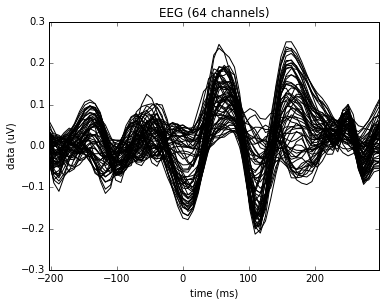

In [5]:
# all beats (including cue)
get_ERP().plot();

ERP from 7200 events


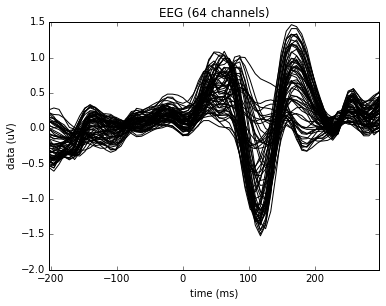

In [6]:
# cue click ERPs - note the scale!
get_ERP(cue_value=0).plot();

ERP from 66060 events


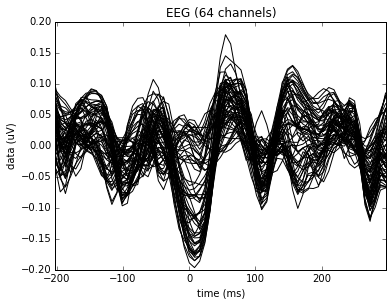

In [7]:
# non-cue beat ERPs, all conditions
get_ERP(cue_value=1).plot();

ERP from 16515 events


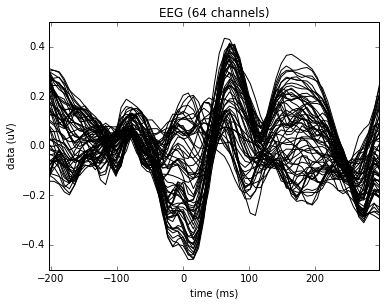

In [8]:
# non-cue beat ERPs, perception condition
get_ERP(conditions=[1], cue_value=1).plot();

ERP from 16515 events


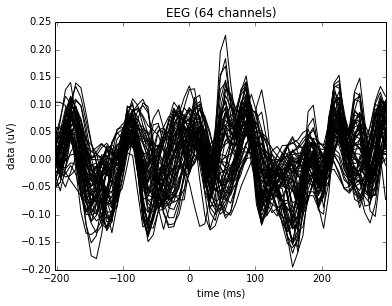

In [9]:
# non-cue beat ERPs, cued imagination condition
get_ERP(conditions=[2], cue_value=1).plot();

ERP from 1835 events


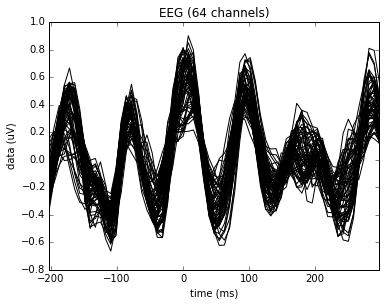

In [10]:
# This looks very intersting!!!
# non-cue beat ERPs, cued imagination condition, selected subject
get_ERP(subjects=['P09'], conditions=[2], cue_value=1).plot();

ERP from 1835 events


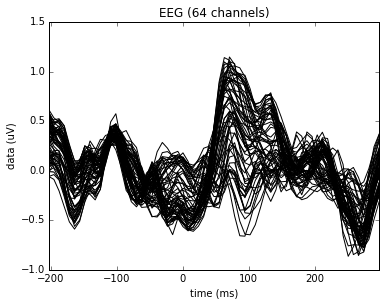

In [11]:
get_ERP(subjects=['P09'], conditions=[1], cue_value=1).plot();